#Ekush Dataset
**Ekhus** is the largest dataset of handwritten Bangla characters for research on handwritten Bangla character recognition. The Ekush database contains handwritten Bengali digits (০ through ৯), letters and can provide a baseline for testing Bengali digit and letter recognition using the machine and deep learning architecture.


<div align="center">
<img src="https://drive.google.com/uc?id=1CcAG-Et-fpvtVh7Kjv7ZU7Ih6HmwbzRT" width="200">
<img src="https://drive.google.com/uc?id=1qPn7h0YyKLEC3GHwDJAs5jf8oNQLJnvF" width="200">
<img src="https://drive.google.com/uc?id=1x5_DN8uzGFOVhqSK4OVsEwuWy3FBHZZU" width="200">
</div>
<div align="center">
<img src="https://drive.google.com/uc?id=1A9HcemWBWa7vHlfvmZYwO8uDXcaAGeGg" width="200">
<img src="https://drive.google.com/uc?id=1PAJrQ4bQxxopv-UI_YcM81lxoE8dvCGK" width="200">
<img src="https://drive.google.com/uc?id=1HDm1iy2FBQSHELXDFxx3TlBaqViGJ-Vn" width="200">
<figcaption>figure 1: Ekush dataset Snapshot</figcaption>
</div>

</div>



**Importing Necessary Libaries**

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models

#**Pre Processing**

---
In the website ([https://shahariarrabby.github.io/ekush/#home](https://) ) I found two CSV files of the male and female dataset with the raw image data. As their task was to classify Bengali digits so there are ten labels. But my given task was to find that whether the written digit was written by a male or female. So I need to change the label of the CSV files. So there is two way I found out to solve the problem. One way is I just change the label column using pandas library as CSV file contains all pixel values. Another approach is to use the raw image and creative CSV with image Id and labeling of male or female. As I completed my Numtadb dataset assignment earlier with the raw image I decided to use the same formatting code and choose to work with the raw data of the Ekhush dataset. In their raw data folder male and female written digit were separated into different folders according to digit values. I merged and renamed those images for both males and females and put them into two folders. Then I reshaped those images into 200*200 dimensions as images were not in the same dimensions and created two new folders containing male and female.
#Re-size code
```
from PIL import Image
import glob
import os

# new folder path (may need to alter for Windows OS)
# change path to your path
path = 'C:/Users/Anas/Downloads/archive/female_digit'
# create new folder
if not os.path.exists(path):
    os.makedirs(path)

# loop over existing images and resize
# change path to your path
for filename in glob.glob('C:/Users/Anas/Downloads/archive/ female_digit200/*.png'):
    img = Image.open(filename).resize((200,200))
    # save resized images to new folder with existing filename
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))
```
Then I created 2 CSV files for male and female. I took the two-image folder and generate a two CSV file containing the image name and label.

#CSV Creating From Raw Images
```
import os
import pandas
a=os.listdir('C:/Users/Anas/Downloads/raw_image/male_digit200/')
print(a)
for i in a:
    print(i)
l=[]
for i in range(len(a)):
    l.append(0)
df = pandas.DataFrame(data={"digit": 0, "filename": a})
df.to_csv("C:/Users/Anas/Downloads/raw_image/male_digit200.csv", sep=',',index=False)
```















- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 2**
  - 0 1


*  **Dataset Length : 30688**




**For Accessing Drive Contents**






In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Google Drive directory for Files**

In [ ]:
PATH = '/content/gdrive/MyDrive/sc_data_as1/ekush/'
os.listdir(PATH)

['maleDigits.csv',
 'femaleDigits.csv',
 'mergeddataset.csv',
 'mergeddataset(nonow).csv',
 'male_digit200.csv',
 'female_digit200.csv',
 'female_digit200',
 'male_digit200',
 'train_n200',
 'ekush3.pkl',
 'ekush4.pkl',
 'ekush5.pkl',
 'ekush1.pkl',
 'ekush2.pkl']

**A function for reading data from CSV files**

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('male_digit200.csv')
b_csv = showRawTrainingSamples('female_digit200.csv')

male_digit200.csv
Index(['digit', 'filename'], dtype='object')
female_digit200.csv
Index(['digit', 'filename'], dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:2, :])   
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)

             filename  digit
0         male_a0.jpg      0
1         male_a1.jpg      0
2        male_a10.jpg      0
3       male_a100.jpg      0
4      male_a1000.jpg      0
...               ...    ...
15063   male_j995.jpg      0
15064   male_j996.jpg      0
15065   male_j997.jpg      0
15066   male_j998.jpg      0
15067   male_j999.jpg      0

[15068 rows x 2 columns]
      filename  digit
0  male_a0.jpg      0
1  male_a1.jpg      0
               filename  digit
0         female_a0.jpg      1
1         female_a1.jpg      1
2        female_a10.jpg      1
3       female_a100.jpg      1
4      female_a1000.jpg      1
...                 ...    ...
15615   female_j995.jpg      1
15616   female_j996.jpg      1
15617   female_j997.jpg      1
15618   female_j998.jpg      1
15619   female_j999.jpg      1

[15620 rows x 2 columns]
        filename  digit
0  female_a0.jpg      1
1  female_a1.jpg      1


**Merging CSV files**

In [ ]:
total_csv = [a_csv, b_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

30688


**Create a Path for merged Images**

In [ ]:
TRAIN_PATH = '/content/gdrive/MyDrive/sc_data_as1/ekush/train_n200'
#os.mkdir(TRAIN_PATH)



**Merging image Function**

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)

**Calling merger function for images**

In [ ]:
processImages('male_digit200')
print('A Done')
processImages('female_digit200')
print('B Done')


A Done
B Done


**Create a Custom Dataset Function**

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]
c=1

train_transform = transforms.Compose([
    transforms.Grayscale(c),
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Grayscale(c),
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)
print(train_data[0])
print("Trainig Samples: ",len(train_data))

(tensor([[[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
           1.0000,  1.0000,  0.9922,  0.9922,  0.9922,  0.9922,  0.9922,
           0.9922,  0.9922,  0.9922,  1.0000,  1.0000,  1.0000,  1.0000,
           1.0000,  1.0000,  0.9922,  0.9922,  0.9922,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.9922,  0.9922,
           0.9843,  0.9843,  0.9216,  0.7647,  0.7333,  0.7412,  0.7333,
           0.7412,  0.7725,  0.9137,  0.9843,  0.9922,  0.9922,  0.9922,
           0.9843,  0.9922,  0.9922,  0.9843,  0.9843,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000,  0.9922,  0.9843,  0.9843,
           0.9843,  0.9765,  0.5686, -0.4118, -0.5843, -0.5686, -0.5765,
          -0.5686, -0.4588,  0.1216,  0.4039,  0.5294,  0.8745,  0.9843,
           0.9765,  0.9765,  0.9843,  0.9922,  0.9922,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  0.9922,  0.9922,  0.9922,  0.9843,  0.9843,
           0.9529,  0.6549, -0.1843, -0.8902, -

#Hyper Parameter


*  **Epochs:**
One Epoch is when an entire dataset is passed forward and backward through the neural network only once.
*  **Batch Size:**
Total number of training examples present in a single batch.

*  **Iterations:** Iterations is the number of batches needed to complete one epoch.


* **Learning Rate:** The amount that the weights are updated during training is referred to as the step size or the “learning rate.”











# **Hyper Parameter Tuning**





##Case 01
First I randomly took  **batch size**,**iteration** and **learning rate** in accordance of **150,7000,0.04**.As the number of batch sizes is small I took a comparatively large learning rate and decide to give a larger iteration number as comparatively less batch size was used. The length of the dataset was 30688. So,

> $epoch$ $number = (7000*150)/30688 = 34 epoches$


> After Implementing logistic Regression found **51.85%** accuracy with this setting.




           



In [ ]:
#setting hpt 1
#case01
#hyperParameter4
#batch size
batch_size = 150
num_iters = 7000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.04

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

##Case 02
After getting less accuracy I changed the  **batch size**,**iteration**, and **learning rate** in accordance with **400,3000 and 0.0004**. I increased the batch size so took a comparatively small learning rate and decide to give a smaller iteration number as a comparatively large batch size used. The length of the dataset was 30688. So,

> $epoch$ $number = (3000*400)/30688 = 39 epoches$


>  After Implementing logistic Regression found **57.36%** accuracy with this setting.



In [ ]:
#setting hpt 2
#case2
#hyperParameter1
#batch size
batch_size = 400
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0004

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

##Case 03
After getting better accuracy in setting 2, for more accurate prediction changed the settings again.So I took **batch size**,**iteration** and **learning rate** in accordance of **200,4000 and 0.003**.I decreased the batch size so took a comparatively larger learning rate and decide to give a larger iteration number as a comparatively smaller batch size used. The length of the dataset was 30688. So,

> $epoch$ $number = (4000*200)/30688 = 26 epoches$

>  After Implementing logistic Regression found **58.01%** accuracy with this setting.



In [ ]:
#setting hpt 3
#case3
#hyperParameter3
#batch size
batch_size = 200
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.003

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

##Case 04
After getting a good accuracy in setting 3, for more accurate prediction changed the settings again.So I took **batch size**,**iteration** and **learning rate** in accordance of **256,6500 and 0.0041**.I increased the batch size a little bit so took a comparatively larger learning rate as a test if any improvement may see with a larger learning rate and decide to gave a little bigger iteration number.The length of the dataset was 30688. So,

> $epoch$ $number = (6500*256)/30688 = 54 epoches$

>  After Implementing logistic Regression found **59.81%** accuracy with this setting.

In [ ]:
#setting hpt 4
#case4
#hyperParameter5
batch_size = 256
num_iters = 6500
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0041

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

##Case 05
After getting better accuracy in setting 4, for more accurate prediction changed the settings again.So I took **batch size**,**iteration** and **learning rate** in accordance of **256,5000 and 0.00004**.I did not change the batch size but took a comparatively very smaller learning rate and decide to give a little smaller iteration number than the previous setting.The length of the dataset was 30688. So,

> $epoch$ $number = (256*4000)/30688 = 41 epoches$

>  After Implementing logistic Regression found **60.20%** accuracy with this setting.

In [ ]:
#setting hpt 5
#case5
#hyperParameter7
#batch size
batch_size = 256
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.00004

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

**Sending data to train and test loader**

In [ ]:


# split data 20% for testing
test_size = 0.1
train_data[0]
# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
#print(indices)
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
#print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]
#print(train_idx)
#print(test_idx)

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
#print(train_sampler)
#print(test_sampler)
# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

#print("Train dataloader:{}".format(len(train_loader)))
#print("Test dataloader:{}".format(len(test_loader)))

In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)


In [ ]:
print(num_epochs)

40


In [ ]:
print(len(train_idx))
print(len(test_idx))

27620
3068


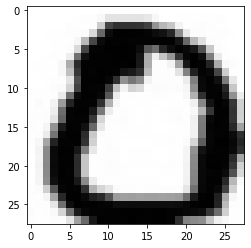

In [ ]:
## Displaying a MNIST Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_data[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

Label:
0


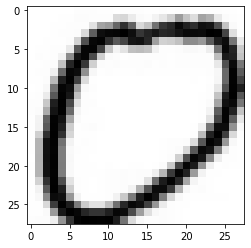

In [ ]:
## Displaying another MNIST Image
# Label
print("Label:")
print(train_data[2][1])

show_img = train_data[2][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [ ]:
# One Image Size
print(train_data[0][0].size())
print(train_data[0][0].numpy().shape)
# First Image Label
print(train_data[59][1])

torch.Size([1, 28, 28])
(1, 28, 28)
0


# Logistic Regression

Logistic Regression is an example of a classification algorithm which is used to find a relationship between features and the probability of a particular outcome. The term “Logistic” is taken from the Logit function that is used in this method of classification. Instead of fitting a straight line or hyperplane, the logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1. The logistic function is defined as:

$logistic(η)=\frac{1}{1+exp(−η)}$

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = torch.sigmoid(logits)
        return logits, probas
        #return logits

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)

# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

**For optimizer I used Adam**

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_data[18][0].numpy().shape

(1, 28, 28)

In [ ]:
#settng1
#setting4
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.499453067779541. Accuracy: 56.45371577574967
Iteration: 1000. Loss: 0.8832951784133911. Accuracy: 53.617992177314214
Iteration: 2000. Loss: 0.713193416595459. Accuracy: 55.50847457627118
Iteration: 2500. Loss: 1.0147916078567505. Accuracy: 54.204693611473274
Iteration: 3000. Loss: 0.8562780022621155. Accuracy: 53.0638852672751
Iteration: 3500. Loss: 0.8442702889442444. Accuracy: 53.8787483702738
Iteration: 4000. Loss: 1.6228183507919312. Accuracy: 52.3142112125163
Iteration: 4500. Loss: 0.9498113989830017. Accuracy: 54.628422425032596
Iteration: 5000. Loss: 0.9111449122428894. Accuracy: 51.40156453715776
Iteration: 5500. Loss: 1.2462478876113892. Accuracy: 53.84615384615385
Iteration: 6000. Loss: 1.1169241666793823. Accuracy: 51.857887874837026


In [ ]:
#settng2
#setting1
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6708400249481201. Accuracy: 57.65971316818774
Iteration: 1000. Loss: 0.648911714553833. Accuracy: 57.17079530638853
Iteration: 1500. Loss: 0.660564661026001. Accuracy: 58.14863102998696
Iteration: 2000. Loss: 0.6440963745117188. Accuracy: 58.57235984354629
Iteration: 2500. Loss: 0.6662710309028625. Accuracy: 57.366362451108216


In [ ]:
#settng3
#setting3
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.681424617767334. Accuracy: 58.18122555410691
Iteration: 1000. Loss: 0.701723575592041. Accuracy: 57.72490221642764
Iteration: 1500. Loss: 0.6718512177467346. Accuracy: 58.57235984354629
Iteration: 2000. Loss: 0.6809971332550049. Accuracy: 58.507170795306386
Iteration: 2500. Loss: 0.6734543442726135. Accuracy: 58.93089960886571
Iteration: 3000. Loss: 0.6425724625587463. Accuracy: 57.23598435462842
Iteration: 3500. Loss: 0.6766534447669983. Accuracy: 58.01825293350717


In [ ]:
#settng4
#SETTING5
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6412940621376038. Accuracy: 59.22425032594524
Iteration: 1000. Loss: 0.635563313961029. Accuracy: 60.104302477183836
Iteration: 1500. Loss: 0.6762729287147522. Accuracy: 60.36505867014342
Iteration: 2000. Loss: 0.6465674638748169. Accuracy: 60.039113428943935
Iteration: 2500. Loss: 0.6638697385787964. Accuracy: 59.58279009126467
Iteration: 3000. Loss: 0.673425018787384. Accuracy: 59.38722294654498
Iteration: 3500. Loss: 0.6694508194923401. Accuracy: 60.104302477183836
Iteration: 4000. Loss: 0.6662656664848328. Accuracy: 60.13689700130378
Iteration: 4500. Loss: 0.684797465801239. Accuracy: 60.39765319426336
Iteration: 5000. Loss: 0.6671454906463623. Accuracy: 60.59322033898305
Iteration: 5500. Loss: 0.6660662293434143. Accuracy: 59.8109517601043


In [ ]:
#settng5
#setting7
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6501194834709167. Accuracy: 59.74576271186441
Iteration: 1000. Loss: 0.6641712188720703. Accuracy: 60.00651890482399
Iteration: 1500. Loss: 0.6404795050621033. Accuracy: 58.18122555410691
Iteration: 2000. Loss: 0.6588123440742493. Accuracy: 59.0612777053455
Iteration: 2500. Loss: 0.6655935645103455. Accuracy: 60.13689700130378
Iteration: 3000. Loss: 0.64925217628479. Accuracy: 60.202086049543674
Iteration: 3500. Loss: 0.6430917978286743. Accuracy: 60.202086049543674


## Comparison Table

**Ekush Dataset Comparision Table in Different Settings:-**

| Settings        | Batch Size     | Iteration Number|Learing rate   |Epochs| Accuracy(%)|Dataset Length|
| :------------- | :----------: | -----------: | ------------:|--------:|---------:|-------:|
|  1 | 150   | 7000 |0.04   | 34 |51.85||
|  2 | 400   | 3000 |0.0004  | 39 |57.36||
|  3 | 200  | 4000  |0.003  | 26 |**58.01**|**30688**|
|  4 | 256  | 6500  |0.0041  | 54 |**59.81**||
|  5 | 256   | 5000 |0.00004   | 41|**60.20**||


**Loss Graphs**

[1.499453067779541, 0.8832951784133911, 0.9597774147987366, 0.713193416595459, 1.0147916078567505, 0.8562780022621155, 0.8442702889442444, 1.6228183507919312, 0.9498113989830017, 0.9111449122428894, 1.2462478876113892, 1.1169241666793823]


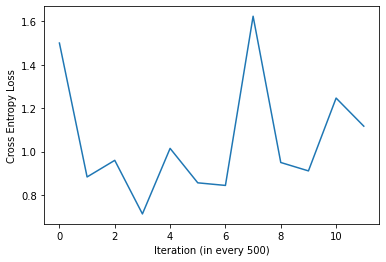

In [ ]:
#loss1
#4
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[0.6708400249481201, 0.648911714553833, 0.660564661026001, 0.6440963745117188, 0.6662710309028625]


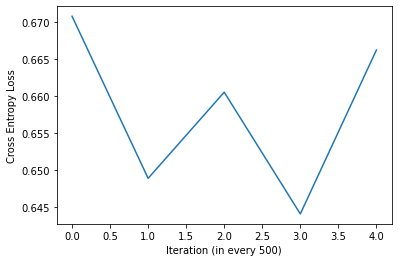

In [ ]:
#loss2
#1
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[0.681424617767334, 0.701723575592041, 0.6718512177467346, 0.6809971332550049, 0.6734543442726135, 0.6425724625587463, 0.6766534447669983]


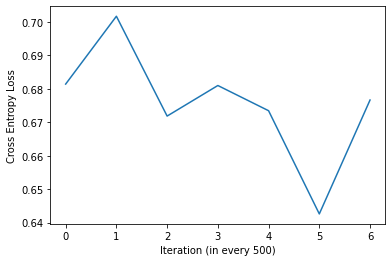

In [ ]:
#loss3
#3
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[0.6412940621376038, 0.635563313961029, 0.6762729287147522, 0.6465674638748169, 0.6638697385787964, 0.673425018787384, 0.6694508194923401, 0.6662656664848328, 0.684797465801239, 0.6671454906463623, 0.6660662293434143]


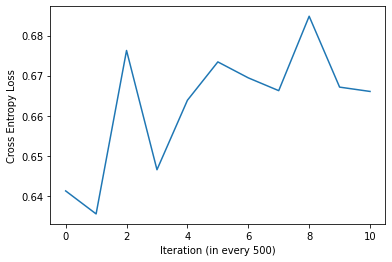

In [ ]:
#loss4
#5
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[0.6501194834709167, 0.6641712188720703, 0.6404795050621033, 0.6588123440742493, 0.6655935645103455, 0.64925217628479, 0.6430917978286743]


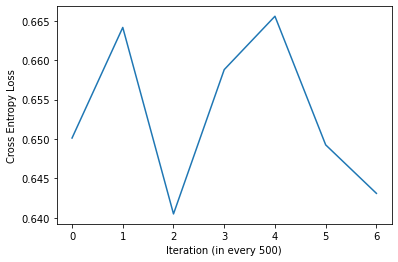

In [ ]:
#loss5
#7
import matplotlib
import matplotlib.pyplot as plt
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Accuracy Graphs**

[56.45371577574967, 53.617992177314214, 55.50847457627118, 54.204693611473274, 53.0638852672751, 53.8787483702738, 52.3142112125163, 54.628422425032596, 51.40156453715776, 53.84615384615385, 51.857887874837026]


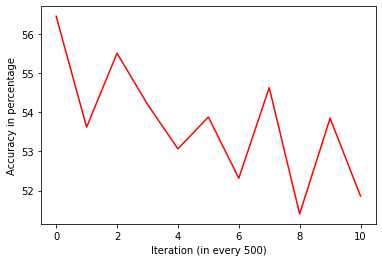

In [ ]:
#acc1
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [56.45371577574967,53.617992177314214,  55.50847457627118, 54.204693611473274, 53.0638852672751,53.8787483702738, 52.3142112125163, 54.628422425032596, 51.40156453715776, 53.84615384615385, 51.857887874837026]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[57.65971316818774, 57.17079530638853, 58.14863102998696, 58.57235984354629, 57.366362451108216]


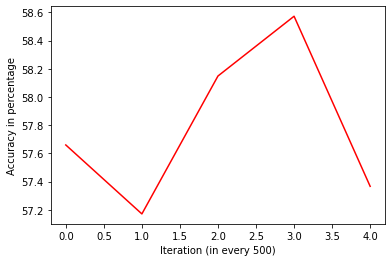

In [ ]:
#acc2
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [ 57.65971316818774, 57.17079530638853, 58.14863102998696,58.57235984354629,57.366362451108216]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[58.18122555410691, 57.72490221642764, 58.57235984354629, 58.507170795306386, 58.93089960886571, 57.23598435462842, 58.01825293350717]


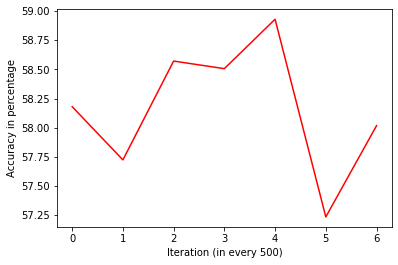

In [ ]:
#acc3
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [58.18122555410691, 57.72490221642764, 58.57235984354629,58.507170795306386,58.93089960886571,57.23598435462842,58.01825293350717]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[59.22425032594524, 60.104302477183836, 0.36505867014342, 60.039113428943935, 59.58279009126467, 59.38722294654498, 60.104302477183836, 60.13689700130378, 60.39765319426336, 60.59322033898305, 59.8109517601043]


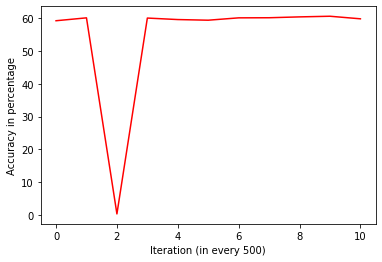

In [ ]:
#acc4
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [ 59.22425032594524,60.104302477183836,0.36505867014342, 60.039113428943935, 59.58279009126467,59.38722294654498,60.104302477183836, 60.13689700130378,60.39765319426336, 60.59322033898305,59.8109517601043]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[59.74576271186441, 60.00651890482399, 58.18122555410691, 59.0612777053455, 60.13689700130378, 60.202086049543674]


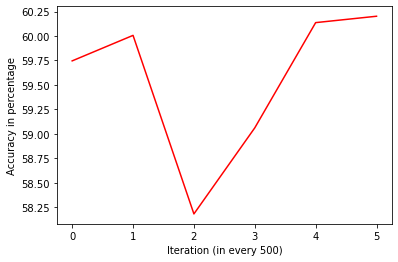

In [ ]:
#acc5
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [ 59.74576271186441,60.00651890482399,58.18122555410691, 59.0612777053455,60.13689700130378,60.202086049543674]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

# A Comprehensive Study between Loss and Accuracy

**Case 1**
<div align="center">
<img src="https://drive.google.com/uc?id=1TNK5mrM8uDuOiyzpec2rjy7TV98VYI5x" width="300">
<img src="https://drive.google.com/uc?id=1lQnStJrSuiTYtjkwCKbExGt_pjXG9YQx"width="300">
<figcaption>figure 2: Accuracy and Loss in Case 1 </figcaption>


> At the Initial time the loss was higher and accuracy was lower. Then the loss started decreasing and the accuracy too increased linearly. But after 3000 iterations the loss suddenly goes up and so the accuracy goes up too. Thus at last the loss was decreasing and achieved a **51.85%** accuracy. As the datapoint was too complex  I was not able to achieve a linear loss function graph.

**Case 2**
<div align="center">
<img src="https://drive.google.com/uc?id=1psgSqomHa-J1oAGoSMhd0VsOt19xeL4t" width="300">
<img src="https://drive.google.com/uc?id=1w3Tt60Lo0WfJ_hmhX1a_EHINSlhEfvyu"width="300">
<figcaption>figure 3: Accuracy and Loss in Case 2 </figcaption>


> At the Initial time the loss was a little lower and accuracy was too. Then after more iterations, the loss started decreasing almost linearly and the accuracy too decreased linearly.  Thus at last the loss was decreasing and achieved a **57.36%** accuracy. As the datapoint was too complex  I was not able to achieve a linear loss function graph.

**Case 3**
<div align="center">
<img src="https://drive.google.com/uc?id=1l2Fdbau7J-3QQxFSirlgAAuGrFOoasFB" width="300">
<img src="https://drive.google.com/uc?id=1YFNdrijpjqwnm7ALnAF-nE7XdQRx62BJ"width="300">
<figcaption>figure 4: Accuracy and Loss in Case 3 </figcaption>


> At the Initial time the loss was higher and accuracy was lower. Then after 2000 iterations, the loss started decreasing. Thus at last the loss was increasing and achieved a **58.01%** accuracy. As the datapoint was too complex I was not able to achieve a linear loss function graph.



**Case 4**
<div align="center">
<img src="https://drive.google.com/uc?id=1hQNjvYINC0pzT1xXOpr0jGkFflE12BX8" width="300">
<img src="https://drive.google.com/uc?id=1yhk5nDDK_PE7b_Ss4tID_Z_x4KZdKXyv"width="300">
<figcaption>figure 5: Accuracy and Loss in Case 4 </figcaption>

> At the Initial time the loss was lower and accuracy was higher. Then iterations the loss started increasing and the accuracy too decreased linearly. But after 1500 iterations the accuracy suddenly becomes nearly constant whatever the loss was. Thus achieved a **59.81%** accuracy. As the datapoint was too complex  I was not able to achieve a linear loss function graph.

**Case 5**
<div align="center">
<img src="https://drive.google.com/uc?id=1DqBl0fBsp0LlfLUF0_LV6UR3VHTiEsaj" width="300">
<img src="https://drive.google.com/uc?id=1Gwl_ArGh7H8Ra4tFxTNhCALItpbFus6X"width="300">
<figcaption>figure 6: Accuracy and Loss in Case 5 </figcaption>


> At the Initial time the loss was lower. Then the loss started increasing and the accuracy too increased a little. But after 500 iterations the loss suddenly goes down and so the accuracy too. Thus at last the loss was decreasing and achieved a **60.20%** accuracy. As the datapoint was too complex I was not able to achieve a linear loss function graph.



#Best Model

**Hyper Parameter Values**

$Batch$ $size = 256 $

$Iteration =5000$

$learning$ $Rate = 0.00004$




$Accuracy($%$) = 60.20$

**Model Saving Code**

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'ekush6.pkl')

**Model Loading Code**

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'ekush6.pkl'))
    print('Trained Model Loaded')

**Load Image from Test Loader**

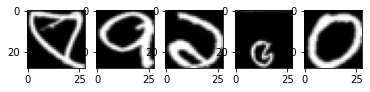

0
0
0
0
0


In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
   

plt.show()

for i in range(5):
    
    print(labels[i].numpy())

#plt.show()

**Counting Correctly Predicted Results**

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [1 0 1 0 0]


# Drive Links for Train Models

> **Setting 1:** [https://drive.google.com/file/d/1-8_SVbq9c6qOaxulklQmC2rnYakq7sdV/view?usp=sharing](https://)

> **Setting 2:** [https://drive.google.com/file/d/1_QN9TK_J1oB1EGH0ozVFI4FJ96BToXa2/view?usp=sharing](https://)

> **Setting 3:** [https://drive.google.com/file/d/1-6ZooDlGYhNQDSXpeYkeWIHeHx7QTxqB/view?usp=sharingg](https://)

> **Setting 4:** [https://drive.google.com/file/d/1-B7z7jkEiPuGeW7wF5SMbumCqfjCMmCh/view?usp=sharing](https://)

> **Setting 5:** [https://drive.google.com/file/d/1sj8lS-7eCbhE10nln_yhxEu2uDG5ESTO/view?usp=sharing](https://)









